# Stanza Data Challenge

Author: **Bhavani Prasad Rao Ejanthkar** <br>
Email : bejanthk@purdue.edu

# Background:

Stanza tracks the data that comes from their **StanzaCal** unit. StanzaCal is a timeline of future & past
events that is live on hundreds of publishers’ sites. StanzaCal makes it possible for fans to discover content
and events, get additional information, access relevant links, buy event tickets, and subscribe to receive
live updates in their devices. Stanza monetize StanzaCal by placing several ad units within it. Tracking and
analyzing the data revolving around these ad units is incredibly important for their business revenue. <br>

The two key metrics in play in advertising are **impressions** and **CPM**. An impression occurs when an ad
is shown on the page. CPM (cost per mille) is the amount of revenue Stanza receive per 1000 impressions of an
ad. If an ad for the Warriors had a CPM of 1000 USD, they will see $1 of revenue every
time we make an impression of that ad.

# Business Objective:

To Construct a notification system that detects when the CPM for any site becomes abnormally **low** or **high**.
If the CPMs drop abnormally, it is likely that something has gone wrong with the ads on that site. Knowing about this quickly can help the company to prevent lost ad revenue.<br><br>
Optimizing the advertising strategy may well mean different things for different businesses, but in each case the end goal of any analysis is to provide actionable answers to the relevant questions which can drive business performance, however that may be measured.

# Part 1: Obtaining the Data

In [177]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import seaborn as sns
from numpy import array
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [178]:
#Read the dataset csv file and store our dataset into a dataframe called "data" an naming the columns

data = pd.read_csv('daily_revenue.csv')
data

,date,site,revenue,pageviews
0,2016-07-13,wearewearside,0.539353,389
1,2016-07-13,projectspurs,3.588072,2353
2,2016-07-13,totalbarca,5.130714,1228
3,2016-07-14,projectspurs,4.264064,2762
4,2016-07-14,totalbarca,2.280724,539
5,2016-07-14,hoosierhuddle,0.219857,187
6,2016-07-14,wearewearside,0.895627,638
7,2016-07-15,hoosierhuddle,0.132319,173
8,2016-07-15,wearewearside,0.064656,71
9,2016-07-15,totalbarca,2.157703,785


# Part 2: Scrubbing the Data

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [179]:
# Checking information related to the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17747 entries, 0 to 17746
Data columns (total 4 columns):
date         17747 non-null object
site         17747 non-null object
revenue      17747 non-null float64
pageviews    17747 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 554.7+ KB


In [180]:
# Check to see if there are any missing values in our data set
data.isnull().any()

date         False
site         False
revenue      False
pageviews    False
dtype: bool

# Description of Data

The data consists of the following variables: <br>

1. **date**           : The date
2. **site**           : The name Of the site that published the ad 
3. **daily_revenue**  : The daily revenue generated by site
4. **pageviews or impressions**  : Number of impressions of ad the site made
5. **CPM**            : Coste Per Mille is the key metric that we calculate from the above features.

In [181]:
# Get a quick overview of what we are dealing with in our dataset
data.head()

,date,site,revenue,pageviews
0,2016-07-13,wearewearside,0.539353,389
1,2016-07-13,projectspurs,3.588072,2353
2,2016-07-13,totalbarca,5.130714,1228
3,2016-07-14,projectspurs,4.264064,2762
4,2016-07-14,totalbarca,2.280724,539


In [182]:
#List unique values in the data['site'] column
data.site.unique()

array(['wearewearside', 'projectspurs', 'totalbarca', 'hoosierhuddle',
       'therepublikofmancunia', 'huskermax', 'buffalofambase',
       'philliesnation', 'tennisguru', 'tidefans', 'pittsburghsportsnow',
       'lakersnation', 'rabidhabs', 'royalsblue', 'cornellsun',
       'rousingthekop', 'bluemoon-mcfc', 'opendota', 'packinsider',
       'russellstreet', 'red94', 'mcfcwatch', 'angelswin',
       'foreverwestham', 'arsenal-mania', 'dailythunder', 'hornsports',
       'sixpackspeak', 'dodgerblue', 'live4liverpool', 'thecelticblog',
       'celticquicknews', 'chicitysports', 'sfexaminer',
       'nothingbutnewcastle', 'tigernet', 'allhabs', 'gunnersphere',
       'videocelts', 'raiders411', 'cardinalconnect', 'catchronicles',
       'sportsdaily', 'mynhltraderumors', 'justinbieber', 'birdgang',
       'starwarsnewsnet', 'metschronicle', 'welikela', 'ultimateknicks',
       'arseblog', 'scout', 'raptorsrepublic', 'rihannaitalia',
       'raisethejollyroger', 'silverandblueblood', 'c

In [183]:
#Counting the number of unique sites 
data.site.nunique()

173

In [184]:
data.site.value_counts()

therepublikofmancunia    246
wearewearside            244
totalbarca               241
hoosierhuddle            231
tennisguru               231
philliesnation           229
huskermax                226
lakersnation             222
videocelts               220
dodgerblue               218
sixpackspeak             218
sfexaminer               218
mynhltraderumors         217
hornsports               212
chicitysports            212
dailythunder             211
rabidhabs                211
ultimateknicks           209
journalstar              207
cardinalconnect          205
tigernet                 204
cityweekly               203
destinytracker           202
trekmovie                201
starwarsnewsnet          199
arseblog                 195
telegraphherald          195
catchronicles            195
welikela                 194
slingshotesports         191
                        ... 
umgoblue                  39
howlintwolf               37
zam-csgoutpost            37
zam-dotaoutpos

In [185]:
data['CPM'] = data['revenue']/data['pageviews']*1000

In [186]:
data

,date,site,revenue,pageviews,CPM
0,2016-07-13,wearewearside,0.539353,389,1.386513
1,2016-07-13,projectspurs,3.588072,2353,1.524892
2,2016-07-13,totalbarca,5.130714,1228,4.178106
3,2016-07-14,projectspurs,4.264064,2762,1.543832
4,2016-07-14,totalbarca,2.280724,539,4.231400
5,2016-07-14,hoosierhuddle,0.219857,187,1.175705
6,2016-07-14,wearewearside,0.895627,638,1.403804
7,2016-07-15,hoosierhuddle,0.132319,173,0.764850
8,2016-07-15,wearewearside,0.064656,71,0.910647
9,2016-07-15,totalbarca,2.157703,785,2.748666


# Part 3: Exploring the Data

## 3a. Statistical Overview

**The dataset has:**

About 17747 observations and 5 features <br>
The CPM feature a had a min of 5.020032e-07 and max value of 15061.662574 <br>
Standard deviation of feature CPM is 1.228331e+02 

In [187]:
# Dimension of the data
data.shape

(17747, 5)

In [188]:
# Check the type of our features. 
data.dtypes

date          object
site          object
revenue      float64
pageviews      int64
CPM          float64
dtype: object

In [189]:
# Check the values of CPM for all sites
data.CPM

0        1.386513
1        1.524892
2        4.178106
3        1.543832
4        4.231400
5        1.175705
6        1.403804
7        0.764850
8        0.910647
9        2.748666
10       1.003210
11       0.745936
12       0.677367
13       0.568462
14       2.044365
15       0.713388
16       0.647642
17       0.541601
18       1.955710
19       1.209245
20       0.629057
21       1.896063
22       0.692268
23       0.526951
24       1.020072
25       0.583767
26       0.444567
27       1.600033
28       0.530613
29       0.442495
           ...   
17717    1.461264
17718    0.630846
17719    0.883197
17720    0.854753
17721    1.444979
17722    0.574130
17723    0.639404
17724    0.915921
17725    0.999361
17726    0.483784
17727    0.669661
17728    0.496120
17729    0.614392
17730    0.949773
17731    0.606058
17732    0.896131
17733    0.573419
17734    0.302401
17735    0.310737
17736    0.120628
17737    3.495022
17738    1.301820
17739    0.676523
17740    0.810956
17741    1

In [190]:
# Check the site that has highest CPM
data[data['CPM']==data['CPM'].max()]

,date,site,revenue,pageviews,CPM
377,2016-10-24,lakersnation,165.678288,11,15061.662574


In [191]:
# Check the site that has lowest CPM
data[data['CPM']==data['CPM'].min()]

,date,site,revenue,pageviews,CPM
11465,2017-03-26,zam-wowhead,0.000912,1816568,5.020032e-07


In [192]:
# Display the statistical overview of the CPM

display(data.CPM.describe().transpose())

count    1.774700e+04
mean     3.766633e+00
std      1.228331e+02
min      5.020032e-07
25%      3.633822e-01
50%      7.055885e-01
75%      1.264389e+00
max      1.506166e+04
Name: CPM, dtype: float64

Looking at the values in CPM, we see it is measured in units of $ and all values are positive integers. Plotting the histogram, you can see that almost all of the values are below 1,000.

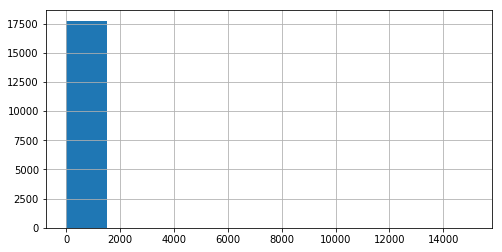

In [193]:
data.CPM.hist(figsize= (8, 4))

In [194]:
subset_df = data[['revenue', 'pageviews', 'CPM']]

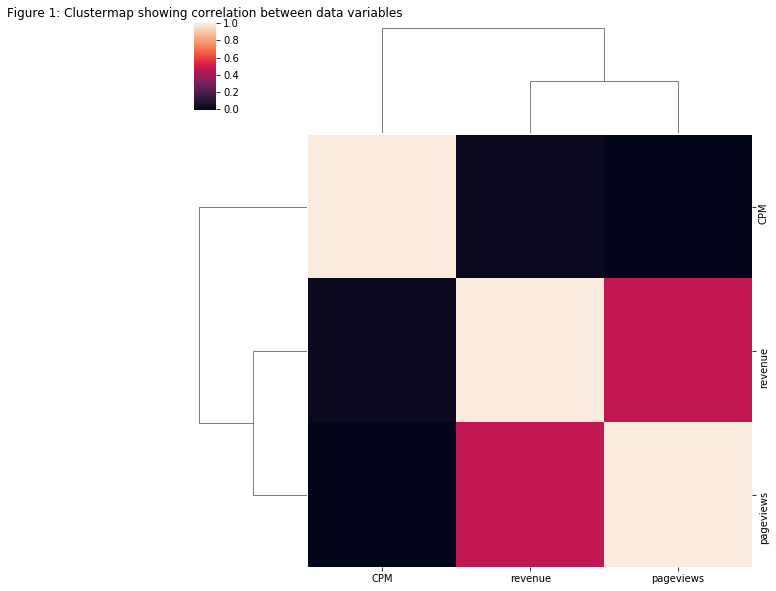

In [195]:
p1 = sns.clustermap(subset_df.corr())
plt.title('Figure 1: Clustermap showing correlation between data variables')
p1.savefig('cpm_corr.png')

In [196]:
corr = subset_df.corr(method='pearson')
corr

,revenue,pageviews,CPM
revenue,1.000000,0.477135,0.023554
pageviews,0.477135,1.000000,-0.005690
CPM,0.023554,-0.005690,1.000000


# Feature Engineering

In [197]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
data['year'] = data['date'].map(year)
data.head()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
data['month'] = data['date'].map(month)
data.head()
day = lambda x: datetime.strptime(x, "%Y-%m-%d" ).day
data['day'] = data['date'].map(day)
data.head()

,date,site,revenue,pageviews,CPM,year,month,day
0,2016-07-13,wearewearside,0.539353,389,1.386513,2016,7,13
1,2016-07-13,projectspurs,3.588072,2353,1.524892,2016,7,13
2,2016-07-13,totalbarca,5.130714,1228,4.178106,2016,7,13
3,2016-07-14,projectspurs,4.264064,2762,1.543832,2016,7,14
4,2016-07-14,totalbarca,2.280724,539,4.231400,2016,7,14


In [198]:
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]
data['season'] = data['date'].map(season)
data.head() 


,date,site,revenue,pageviews,CPM,year,month,day,season
0,2016-07-13,wearewearside,0.539353,389,1.386513,2016,7,13,2
1,2016-07-13,projectspurs,3.588072,2353,1.524892,2016,7,13,2
2,2016-07-13,totalbarca,5.130714,1228,4.178106,2016,7,13,2
3,2016-07-14,projectspurs,4.264064,2762,1.543832,2016,7,14,2
4,2016-07-14,totalbarca,2.280724,539,4.231400,2016,7,14,2


In [199]:
data.head()

,date,site,revenue,pageviews,CPM,year,month,day,season
0,2016-07-13,wearewearside,0.539353,389,1.386513,2016,7,13,2
1,2016-07-13,projectspurs,3.588072,2353,1.524892,2016,7,13,2
2,2016-07-13,totalbarca,5.130714,1228,4.178106,2016,7,13,2
3,2016-07-14,projectspurs,4.264064,2762,1.543832,2016,7,14,2
4,2016-07-14,totalbarca,2.280724,539,4.231400,2016,7,14,2


In [200]:
data['WEEKDAY'] = ((pd.DatetimeIndex(data.date).dayofweek) // 5 == 1)
data['WEEKEND'] = ~data['WEEKDAY']
data['WEEKDAY'] = data['WEEKDAY'].astype(float)
data['WEEKEND'] = data['WEEKEND'].astype(float)

In [201]:
data

,date,site,revenue,pageviews,CPM,year,month,day,season,WEEKDAY,WEEKEND
0,2016-07-13,wearewearside,0.539353,389,1.386513,2016,7,13,2,0.0,1.0
1,2016-07-13,projectspurs,3.588072,2353,1.524892,2016,7,13,2,0.0,1.0
2,2016-07-13,totalbarca,5.130714,1228,4.178106,2016,7,13,2,0.0,1.0
3,2016-07-14,projectspurs,4.264064,2762,1.543832,2016,7,14,2,0.0,1.0
4,2016-07-14,totalbarca,2.280724,539,4.231400,2016,7,14,2,0.0,1.0
5,2016-07-14,hoosierhuddle,0.219857,187,1.175705,2016,7,14,2,0.0,1.0
6,2016-07-14,wearewearside,0.895627,638,1.403804,2016,7,14,2,0.0,1.0
7,2016-07-15,hoosierhuddle,0.132319,173,0.764850,2016,7,15,2,0.0,1.0
8,2016-07-15,wearewearside,0.064656,71,0.910647,2016,7,15,2,0.0,1.0
9,2016-07-15,totalbarca,2.157703,785,2.748666,2016,7,15,2,0.0,1.0
